# Code 3
- Numerical & Categorical EDA
  - Outlier Detection and Basic Imputation (Mean/Median/Mode)
- Logistic Model (Balanced/ Unbalanced)

## 1/ Import Libraries

In [1]:
#CodeSection1
from google.colab import drive
drive.mount('/mntDrive') 

Mounted at /mntDrive


In [2]:
#CodeSection2
import pandas as pd
import numpy as np

## 2/ Import Data

In [3]:
#CodeSection3
train = pd.read_csv('/mntDrive/MyDrive/__DataScience/3 HR Analytics (Solo)/input/train.csv')
test = pd.read_csv('/mntDrive/MyDrive/__DataScience/3 HR Analytics (Solo)/input/test.csv')

## 3/ Combine both Datasets (train, test)

In [4]:
#CodeSection4
all_data = [train, test]

### Check Combined Data 
- Missing Value
- Data Types

In [5]:
#CodeSection5
# Combine both to check Missing Value
pd.concat([train, test], axis = 0).isnull().sum()

enrollee_id                   0
city                          0
city_development_index        0
gender                     7486
relevent_experience           0
enrolled_university         621
education_level             852
major_discipline           5231
experience                  103
company_size               8830
company_type               9369
last_new_job                671
training_hours                0
target                    15021
dtype: int64

In [ ]:
#CodeSection6
# Check Data types for each variable
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## 4/ EDA - Check Numerical Variables

In [6]:
#CodeSection7
# Lets Import the Seaborn Library
import seaborn as sns

### Lets start with Numerical Variable/Feature - 1

In [7]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014,0.132088
std,9643.749725,0.110189,60.885300,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


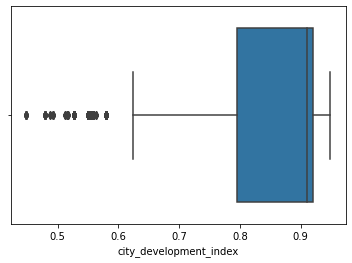

In [8]:
#CodeSection8
# in this case we start with "ApplicantIncome"
sns.boxplot(train['city_development_index'])
# Has Outliers

### Inter Quantile Range Strategy 
- Outlier Detection
- Outlier Treatment

In [9]:
#CodeSection9
# Use quantile function
# Find Q1 and Q3
Q1 = train['city_development_index'].quantile(0.25)
Q3 =  train['city_development_index'].quantile(0.75)

#Find IQR 
IQR = Q3-Q1

#Find Lower Limit and Higher Limit
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR

# Print all Values
print('Q1 : {}'.format(Q1))
print('Q3 : {}'.format(Q3))
print('IQR : {}'.format(IQR))
print(Lower_Whisker, Upper_Whisker)

Q1 : 0.7959999999999999
Q3 : 0.92
IQR : 0.12400000000000011
0.6099999999999998 1.1060000000000003


### Now lets Treat the value by imputing with Mean/Median

In [10]:
#CodeSection10
# Replace Variable with Upper Whisker (there are other strategies) (Applying Lower_wishker since outliers are at lower side)
for dataset in all_data:
  dataset['city_development_index']=dataset['city_development_index'].apply(lambda x : Lower_Whisker if x < Lower_Whisker else x )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


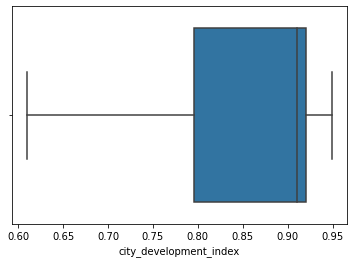

In [11]:
#CodeSection11
# Lets check again
sns.boxplot(train['city_development_index'])
# Now No Outliers

### Replicate for other Numerical Variable/Features

In [13]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.848727,65.899014,0.132088
std,9643.749725,0.106120,60.885300,0.338595
min,1.000000,0.610000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [14]:
#CodeSection12

# Identify all Numerical Variables 
numerical_features = ['training_hours']

# Write a loop to do the same 
for num_feat in numerical_features:
  Q1=train[num_feat].quantile(0.25)
  Q3=train[num_feat].quantile(0.75)

  IQR=Q3-Q1

  Lower_Whisker=Q1-1.5*IQR
  Upper_Whisker=Q3+1.5*IQR

  for dataset in all_data:
    dataset[num_feat]=dataset[num_feat].apply(lambda x : Lower_Whisker if x < Lower_Whisker else x)

## 5/ Impute Numerical Variables

### Impute all Numerical Variables at once



In [19]:
pd.concat([train,test],axis=0).isnull().sum()

enrollee_id                   0
city                          0
city_development_index        0
gender                     7486
relevent_experience           0
enrolled_university         621
education_level             852
major_discipline           5231
experience                  103
company_size               8830
company_type               9369
last_new_job                671
training_hours                0
target                    15021
dtype: int64

In [ ]:
#CodeSection13
# Write a loop to Impute all Numerical Vairbales
<No NUmerical MIssing Value>

## 6/ Impute Categorical Variables
- Lets try another Strategy of Imputing "Missing" where a Category value is missing

### Impute all Categorical Variables at once

In [20]:
#CodeSection14
for dataset in all_data:
  # Categorical Feature 1
  dataset['gender'] = dataset['gender'].fillna('Missing')

  # Categorical Feature 2
  dataset['enrolled_university'] = dataset['enrolled_university'].fillna('Missing')
  
  # Categorical Feature 3
  dataset['education_level'] = dataset['education_level'].fillna('Missing')

  # Categorical Feature 4
  dataset['major_discipline'] = dataset['major_discipline'].fillna('Missing')
  dataset['experience'] = dataset['experience'].fillna('Missing')
  dataset['company_size'] = dataset['company_size'].fillna('Missing')
  dataset['company_type'] = dataset['company_type'].fillna('Missing')
  dataset['last_new_job'] = dataset['last_new_job'].fillna('Missing')

## 7/ Now Re Check all Features

In [21]:
#CodeSection15
# Combine both to check Missing Value
pd.concat([train, test], axis = 0).isnull().sum()

enrollee_id                   0
city                          0
city_development_index        0
gender                        0
relevent_experience           0
enrolled_university           0
education_level               0
major_discipline              0
experience                    0
company_size                  0
company_type                  0
last_new_job                  0
training_hours                0
target                    15021
dtype: int64

## 8/ Prepare Data for Model Model

In [23]:
#CodeSection16
# Check First 5 Rows of Test Data
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,Missing,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,Missing,No relevent experience,no_enrollment,Masters,STEM,8,Missing,Missing,2,88,1


In [24]:
#CodeSection17
# Get X and y Variables for your Dataset
X = train.drop(['enrollee_id','target'], axis =  1)
y = train['target']

### Create Dummy Variables for  Categorical Variables

In [26]:
#CodeSection18
# Get Dummy Variables
X = pd.get_dummies(X,drop_first=True)  # Keep only n - 1 Variables - Use "drop_first = True"

## 9/ Build Model

In [27]:
#CodeSection19
#Import Logistic Regression Library
from sklearn.linear_model import LogisticRegression

#Initialize LR
clf = LogisticRegression(max_iter = 1000)

In [28]:
#CodeSection20
# Fit Model
model = clf.fit(X, y)

### Check Accuracy of Model on Train Data

In [29]:
#CodeSection21
# Predict on Train Data
y_pred = model.predict(X)

### We can use a Accuracy Function from Metrics
- Check Train Accuracy

In [32]:
#CodeSection22
# Import metrics library
from sklearn.metrics import accuracy_score

In [33]:
#CodeSection23
# get Actual "y" variables (use "y_true" as variable)
y_true = train['target']

In [34]:
#CodeSection24
# Print Train Accuracy
print(f" Train Accuracy : {accuracy_score(y_true, y_pred):0.1%}")

 Train Accuracy : 86.8%


## 10/ Predict and Submit

### Predict

In [35]:
#CodeSection25
# Get all the X Variables from the Test Dataset
X_test = test.drop(['enrollee_id'], axis =  1)

In [36]:
#CodeSection26
#Covert to Dummies
X_test = pd.get_dummies(X_test,drop_first=True)

In [ ]:
#CodeSection27
# use this code if the next Code shows error
X_test['Married_Missing']  = 0

In [37]:
#CodeSection28
# Predict on X_test Data ("X_test_prep")
X_test_prep = model.predict(X_test)

### Import Sample Submission

In [38]:
#CodeSection29
sample_submission = pd.read_csv('/mntDrive/MyDrive/__DataScience/3 HR Analytics (Solo)/input/sample_submission.csv')
sample_submission.head()

,enrollee_id,target
0,16548,0
1,12036,0
2,11061,0
3,5032,0
4,17599,0


### Create Submission File

In [39]:
#CodeSection30
submission = pd.DataFrame({
    'enrollee_id' : test['enrollee_id'],
    'target' : X_test_prep
})

### Export Submission File

In [40]:
#CodeSection31
submission.to_csv('/mntDrive/MyDrive/__DataScience/3 HR Analytics (Solo)/output/O3_LR_Outlier.csv', index = False)

In [ ]:
# LB Accuracy : 0.7777